<a href="https://colab.research.google.com/github/vu-topics-in-big-data-2022/Project-Incident-Team2/blob/master/plot_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geopandas pandas pyarrow matplotlib plotly
import geopandas as gpd

In [5]:
roads=gpd.read_file('USA_Tennessee.geojson')
roads.head(2)

C:\Users\zakmz\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


,OID,XDSegID,PreviousXD,NextXDSegI,FRC,ToExport,Miles,Lanes,RoadNumber,RoadName,...,PrimaryTmc,RoadList,StartLat,StartLong,EndLat,EndLong,Bearing,XDGroup,ShapeSRID,geometry
0,7229828,136894283,441153578.0,441154707.0,4,None,0.475558,1.0225,,KNOB CREEK RD,...,,KNOB CREEK RD,36.35334,-82.42849,36.34747,-82.42857,E,765512,4326,"LINESTRING (-82.42849 36.35334, -82.42794 36.3..."
1,7229829,136894316,NaN,NaN,5,None,0.047735,1.1470,,16TH ST SW,...,,16TH ST SW|16TH ST,35.95902,-83.93125,35.95965,-83.93160,N,765513,4326,"LINESTRING (-83.93128 35.95901, -83.93158 35.9..."


In [6]:
roads.columns

Index(['OID', 'XDSegID', 'PreviousXD', 'NextXDSegI', 'FRC', 'ToExport',
       'Miles', 'Lanes', 'RoadNumber', 'RoadName', 'Country', 'State',
       'County', 'PostalCode', 'SlipRoad', 'SpecialRoa', 'IsConnecto',
       'AllTmcList', 'PrimaryTmc', 'RoadList', 'StartLat', 'StartLong',
       'EndLat', 'EndLong', 'Bearing', 'XDGroup', 'ShapeSRID', 'geometry'],
      dtype='object')

In [8]:
roads=roads[roads.County=='DAVIDSON']

C:\Users\zakmz\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:187: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


<AxesSubplot:>

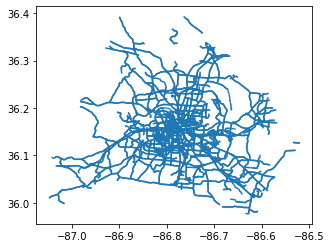

In [10]:
roads.plot()

In [11]:
roads.geometry

9033     LINESTRING (-86.75077 36.17116, -86.75076 36.1...
9045     LINESTRING (-86.77000 36.11989, -86.77046 36.1...
9051     LINESTRING (-86.77935 36.03619, -86.77935 36.0...
9055     LINESTRING (-86.75020 36.15446, -86.75019 36.1...
9056     LINESTRING (-86.71250 36.32843, -86.71272 36.3...
                               ...                        
94650    LINESTRING (-86.76221 36.16760, -86.76275 36.1...
94789    LINESTRING (-86.77707 36.12617, -86.77705 36.1...
94794    LINESTRING (-86.84079 36.15400, -86.84201 36.1...
94893    LINESTRING (-86.74435 36.14281, -86.74437 36.1...
95025    LINESTRING (-86.70474 36.12184, -86.70476 36.1...
Name: geometry, Length: 8641, dtype: geometry

In [12]:
import pandas as pd
incidents=pd.read_parquet('nfd_incidents_xd_seg.parquet')

In [13]:
import shapely
incidents['geometry']=incidents.geometry.apply(shapely.wkt.loads)
incidents = gpd.GeoDataFrame(incidents,geometry=incidents.geometry)
incidents.head(2)

C:\Users\zakmz\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:32: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(np.asarray(data))


,ID_Original,latitude,longitude,emdCardNumber,time_utc,time_local,response_time_sec,day_of_week,weekend_or_not,geometry,Incident_ID,Dist_to_Seg,XDSegID
0,ObjectId(59d3a81908f47311c891f8e2),36.037228,-86.783243,29B5,2017-01-01 07:59:29.507,2017-01-01 01:59:29.507,268.0,6,1,POINT (-86.78324 36.03723),10,13.550370,1.524394e+09
1,ObjectId(59d3a81908f47311c891f8e6),36.037414,-86.786572,29D2P,2017-01-01 08:30:55.000,2017-01-01 02:30:55.000,512.0,6,1,POINT (-86.78657 36.03741),11,3.663952,1.524356e+09


<AxesSubplot:>

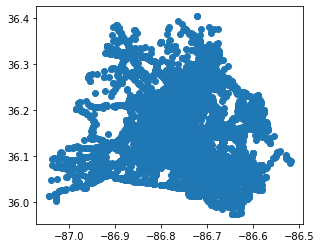

In [14]:
incidents.plot()

In [15]:
weather=pd.read_parquet('weather_tn.parquet')
distinctstations=weather[['station_id','gps_coordinate_latitude', 'gps_coordinate_longitude']].drop_duplicates().dropna()
distinctstations

,station_id,gps_coordinate_latitude,gps_coordinate_longitude
0,720259-63844,35.223,-83.419
1,723235-13896,34.744,-87.600
2,720259-99999,35.223,-83.419
3,723240-13882,35.031,-85.201
4,720264-63827,37.064,-81.798
...,...,...,...
256,723230-03856,34.644,-86.786
257,KUCY,36.380,-88.985
258,723231-63883,34.679,-86.685
259,KUTA,34.680,-90.350


In [22]:
import plotly.express as px
fig = px.scatter_mapbox(distinctstations, lat="gps_coordinate_latitude", hover_name='station_id', lon="gps_coordinate_longitude", size_max=15, zoom=10,mapbox_style='open-street-map')
fig.show()